# **BAB 1 Introduction**

## 1.1. Identitas
    Nama  : Ma'ruf Habibie Siregar  
    Batch : HCK028  
    Program ini dibuat untuk membantu tenaga medis mendeteksi diabetes dini agar bisa dilakukan penanganan lebih awal dan mencegah resiko yang lebih serius.

    Dibawah ini adalah link deployment
[link deployment](https://huggingface.co/spaces/batakjawa/Milestone2_Diabetes_Early_Detection)



## 1.2. Background and Problem Statement  
### 1.2.1. Latar Belakang
    Konsumsi gula berlebihan menjadi masalah kesehatan serius yang sering terabaikan. Hal ini bisa dijumpai di berbagai usia karena mudahnya akses ke makanan dan minuman manis di berbagai tempat seperti supermarket, minimarket, warung-warung, dan gerobak jajanan dipinggir jalan. Kondisi ini sangat mengkhawatirkan karena konsumsi gula secara terus-menerus dapat meningkatkan risiko diabetes.

    Diabetes merupakan salah satu penyebab kematian tertinggi di dunia. Deteksi dini diabetes sangat penting agar risiko komplikasi dapat diminimalisir. Dengan adanya deteksi dini pada masyarakat, tenaga medis, orang tua, dan keluarga dapat melakukan pencegahan risiko yang lebih parah di masa depan. Oleh karena itu, diperlukan metode deteksi dini diabetes untuk membantu orangtua, keluarga, dan tenaga medis dalam pencegahan risiko yang lebih serius serta penanganan lebih awal.

### 1.2.2. Problem Statement
    Melakukan pembuatan machine learning untuk mendeteksi gejala dini diabetes pada masyarakat, sehingga dapat membantu tenaga medis, orang tua, dan keluarga melakukan pencegahan resiko kompilasi yang lebih parah di masa depan.

# **BAB 2 Import Libraries**
    Disini saya akan mencantumkan library-library yang akan saya pakai. Library-library itu akan saya masukkan secara bertahap.

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle


# **BAB 3 Data Loading**

    Disini saya akan loading dataset yang saya perlukan dalam pembuatan machine learning

In [2]:
#Load data csv
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
#Cek 5 baris pertama
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
#Cek 5 baris terakhir
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


    Keterangan nama-nama kolom

| Nama Kolom          | Keterangan                                                                                              |
|---------------------|--------------------------------------------------------------------------------------------------------|
| Age                 | Usia pasien                                                                                             |
| Gender              | Jenis kelamin pasien (Female = perempuan, Male = laki-laki)                                            |
| Polyuria            | Kondisi sering buang air kecil, gejala umum pada diabetes                                              |
| Polydipsia          | Rasa haus yang berlebihan                                                                               |
| Sudden weight loss   | Penurunan berat badan secara tiba-tiba                                                                 |
| Weakness            | Kondisi fisik yang melemah                                                                              |
| Polyphagia          | Rasa lapar atau nafsu makan yang berlebihan                                                            |
| Genital thrush      | Infeksi jamur pada area genital                                                                          |
| Visual blurring     | Penglihatan yang kabur                                                                                      |
| Itching             | Rasa gatal pada anggota badan                                                                                              |
| Irritability        | Mudah marah atau gelisah                                                                               |
| Delayed healing     | Luka yang lama sembuhnya                                                                                   |
| Partial paresis     | Kelemahan atau kelumpuhan sebagian otot                                                                |
| Muscle stiffness    | Kekakuan pada otot                                                                                      |
| Alopecia            | Kebotakan atau rambut yang rontok                                                                           |
| Obesity             | Kegemukan                                                                         |
| Class               | Hasil diagnosis diabetes (Positive = terdiagnosis diabetes, Negative = tidak diabetes)                |


In [5]:
#Cek shape dataset
print('Ukuran dataset :', df.shape)

Ukuran dataset : (520, 17)


    Dari info diatas saya mendapatkan dataset mempunya 520 baris dan 17 kolom

In [6]:
#Cek distribusi target
jumlah_class = df['class'].value_counts() #Menghitung jumlah class positive dan negative
persen_jumlah_class = df['class'].value_counts(normalize=True)*100 #Jumlah positive dan negative di jadikan persen
result_jumlah_class = pd.DataFrame({'Jumlah Kelas': jumlah_class, 'Persentase(%)': persen_jumlah_class}) #Convert ke dataframe
result_jumlah_class

,Jumlah Kelas,Persentase(%)
class,,
Positive,320,61.538462
Negative,200,38.461538


In [7]:
IR = 320/200
print(IR)

1.6


    Dari hasil pengecekan distribusi diatas saya mengasumsikan bahwa data termasuk mild imbalance dengan IR = 1.6
[sumber]https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets. 

In [8]:
#Cek duplikat
total_baris_duplikat = df.duplicated().sum()
print(f"Jumlah total baris duplikat: {total_baris_duplikat}")

Jumlah total baris duplikat: 269


    Dari hasil pengecekan duplikat diatas terdapat 269 data duplikat. Data duplikat itu saya asumsikan sebagai normal berdasarkan keterangan-keterangan pada fitur/kolom, karena bisa jadi gejala pada satu pasien dengan pasien lain itu sama kalau dia terindikasi positif atau negatif diabetes. Maka dari itu saya akan membiarkan data duplikat itu karena terjadi secara normal dan karena tidak ada fitur id yang biasanya membedakan tiap individu.

In [9]:
#Cek Missing Value
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

    Dari info diatas saya dapatkan tidak ada missing value pada datasetnya

In [10]:
#Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

    Dari info diatas saya mendapatkan  
    1. Ketidak konsistensi-an pada nama fitur, dimana ada yang diawal huruf kapital dan ada yang tidak huruf kapital.
    2. Ada spasi antara kata  
    3. Tipe data sudah sesuai  

    Saya akan melakukan perubahan pada nama fitur dengan merubahnya menjadi huruf kecil semua dan menambahkan "_" (underscore) antara kalimat

In [11]:
#Mengubah nama fitur dan target menjadi huruf kecil dan menambah '_' antar kata
df.columns = df.columns.str.lower().str.replace(' ', '_')

#cek info dataset apakah namanya sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

    Nama fitur telah diubah 

# **BAB 4 Exploratory Data Analysis (EDA)**

    Pada bab ini saya akan melakukan beberapa explorasi data, tetapi saya akan copy filenya dahulu supaya tidak mengganggu dataframe asli.

In [12]:
#Copy dataframe untuk EDA
df_eda = df.copy()

    Pertanyaan untuk explorasi data : 
    
    1. Berapa rata-rata umur, nilai tengah, umur minimum serta umur maksimum pada pasien yang terdeteksi positif diabetes?
    2. Apakah pasien yang positif diabetes sering mengalami penyembuhan luka yang lambat?
    3. Bagaimana hubungan antara berat badan yang berlebihan dengan positif terkena diabetes?
    4. Gejala mana yang paling sering ditemui saat seorang terindikasi positif diabetes?
    5. Apakah ada hubungannya umur dengan delay_healing / pelambatan saat penyembuhan luka?
    6. Adakah orang yang positif diabetes tapi tanpa gejala?
    7. Apakah orang yang positif diabetes biasanya mengalami gejala sering buang air kecil (Polyuria) dan haus yang berlebihan (Polydipsia)?

## 4.1. Rata-rata umur, nilai tengah, umur minimum dan umur maximum pada pasien yang positif diabetes

In [13]:
# Filter data pasien positif diabetes
df_positif = df_eda[df_eda['class'] == 'Positive']
df_positif.describe()

,age
count,320.000000
mean,49.071875
std,12.097481
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,90.000000


    Dari hasil di atas saya dapatkan :
    1. Rata-rata umur yang positif diabetes ada di 49 dan mediannya di 48
    2. Umur minimum yang positif diabetes ada di angka 16 tahun, berarti walaupun rata-rata diumur 48 tahun, diabetes juga bisa muncul di usia muda  
    3. Umur maksimum penderita diabetes adalah 90 tahun, berarti walaupun sudah tua renta masih bisa kemungkinan terkena diabetes tahap awal

Text(0, 0.5, 'Umur')

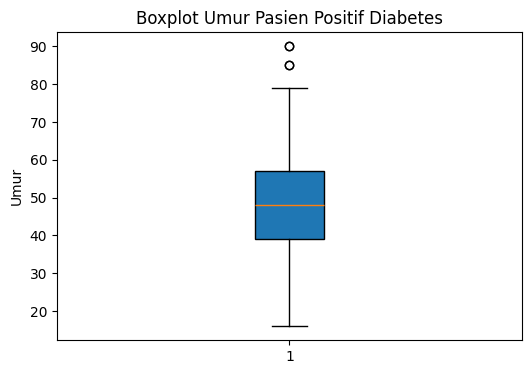

In [14]:
#Membuat botplot
plt.figure(figsize=(6,4))
plt.boxplot(df_positif['age'], patch_artist=True)
plt.title('Boxplot Umur Pasien Positif Diabetes')
plt.ylabel('Umur')

    Dari hasil visualisasi di atas bisa saya dapatkan :  
    1. Rata-rata penderita diabetes ada di umur 39 tahun sampai 58 tahunan  
    2. Ada beberapa pasien penderita diabetes yang sudah tua, yaitu diumur 79 sampai 90 tahun

## 4.2. Pengaruh pasien yang positif diabetes dengan penyembuhan luka yang lambat

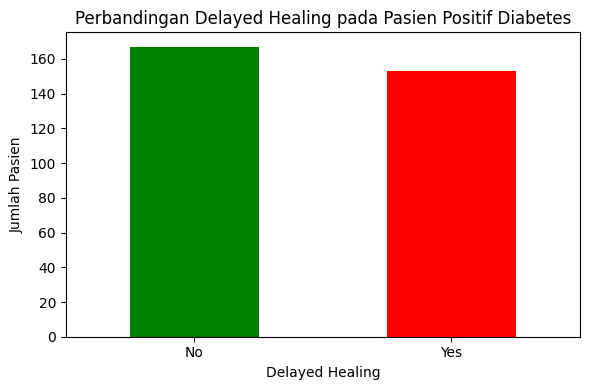

In [15]:
#Menghitung jumlah pasien positif yang penyembuhan lukanya lambat atau tidak lambat
delayed_healing_counts = df_positif['delayed_healing'].value_counts()

#Membuat diagram bar
plt.figure(figsize=(6,4))
delayed_healing_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Perbandingan Delayed Healing pada Pasien Positif Diabetes')
plt.xlabel('Delayed Healing')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

    Dari diagram diatas bisa diambil kesimpulan bahwa pada diabetes tahap awal, Delayed Healing bukan satu-satu faktor untuk melihat bahwa pasien positif diabetes. Saya akan coba cek korelasinya apakah benar delay healing mempengaruhi pasien positif diabetes tahap awal atau tidak. Saya akan menggunakan metode Chi-square karena kedua kolom sama-sama kolom kategorikal.

    Hipotesis :
    H0 = Tidak ada hubungan antara penyembuhan luka yang lambat dengan hasil diagnosa diabetes  
    H1 = Ada hubungan antara penyembuhan luka yang lambat dengan hasil diagnosa diabetes

In [16]:
#Cek korelasi antara delay healing dengan positif/negatif diabetes dengan chi-square
contingency_table1 = pd.crosstab(df_eda['delayed_healing'], df_eda['class'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 0.962
P-value: 0.327


    Dari hasil uji korelasi di atas dimana p-value > 0.05 meyakinkan lagi bahwa tidak ada hubungannya delay healing dengan diagnosa positif atau negatif nya pasien terhadap diabetes.

    Hipotesis :
    H0 = Tidak ada hubungan antara obesitas dengan hasil diagnosa diabetes  
    H1 = Ada hubungan antara obesitas dengan hasil diagnosa diabetes

## 4.3. Hubungan antara berat badan yang berlebihan dengan positif terkena diabetes

    Karena fitur obesitas dan target class adalah kategorikal maka saya akan menggunakan metode chi-square dalam melihat hubungannya

In [17]:
#Cek korelasi antara obesitas dengan positif/negatif diabetes dengan chi-square
contingency_table2 = pd.crosstab(df_eda['obesity'], df_eda['class'])

chi2, p, dof, expected = chi2_contingency(contingency_table2)
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 2.327
P-value: 0.127


    Dari hasil korelasi diatas bisa disimpulkan bahwa H0 gagal ditolak karena p-value > 0.05. Artinya tidak ada bukti cukup kalau obesitas berhubungan dengan status positif diabetes pasien.

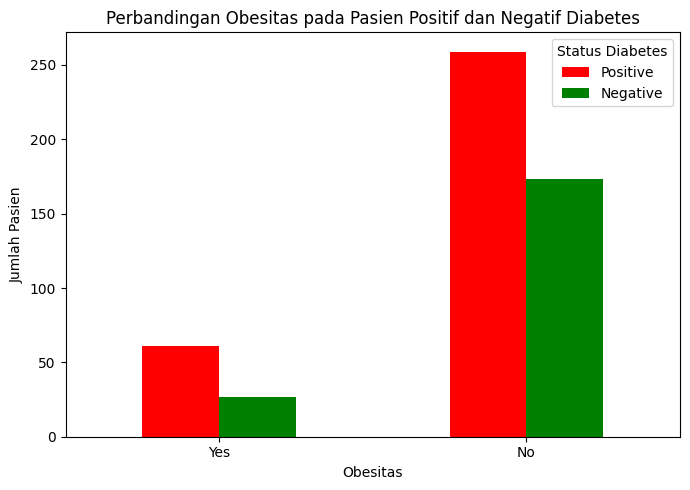

In [18]:
#Membuat diagram pasien yang positif dan negatif diabetes terhadap obesitas

df_negatif = df_eda[df_eda['class'] == 'Negative']

obesity_pos_counts = df_positif['obesity'].value_counts()
obesity_neg_counts = df_negatif['obesity'].value_counts()

# Gabungkan dalam satu DataFrame agar mudah untuk plotting
data_compare = pd.DataFrame({
    'Positive': obesity_pos_counts,
    'Negative': obesity_neg_counts
})

# Pastikan urutan indeks sama (biasanya 'Yes' dan 'No')
data_compare = data_compare.reindex(['Yes', 'No'])

# Membuat plot bar perbandingan positive diabetes dan negatif diabetes terhadap ya/tidak nya obesitas
ax = data_compare.plot(kind='bar', figsize=(7, 5), color=['red', 'green'])
plt.title('Perbandingan Obesitas pada Pasien Positif dan Negatif Diabetes')
plt.xlabel('Obesitas')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.legend(title='Status Diabetes')
plt.tight_layout()
plt.show()

    Dari diagram diatas juga diatas juga memperkuat bahwa tidak selalu orang yang obesitas, positif diabetes tahap awal.

## 4.4. Hubungan umur dengan pelambatan penyembuhan luka?

In [19]:
#Melihat skew fitur umur
df_eda['age'].skew()

np.float64(0.3293593578272701)

    Dari hasil diatas saya simpulkan bahwa distribusi umur normal karena skewnessnya kecil. Maka dari itu saya akan melakukan metode Uji T-test statistic karena fitur delay healing adalah fitur kategorikal

    Hipotesis :
    H0 = Tidak ada hubungannya umur dengan perlambatan penyembuhan luka
    H1 = Ada hubungannya umur dengan perlambatan penyembuhan luka

In [20]:
#Uji T-statistic

# Data umur berdasarkan kategori delayed_healing
age_delayed_yes = df_eda[df_eda['delayed_healing'] == 'Yes']['age']
age_delayed_no = df_eda[df_eda['delayed_healing'] == 'No']['age']

# Hitung t-statistic dan p-value menggunakan independent t-test
t_stat, p_val = stats.ttest_ind(age_delayed_yes, age_delayed_no)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: 6.065
P-value: 0.000


    Dari hasil diatas menunjukkan :
    1. t-stastic menunjukkan adanya hubungan antara umur dan delay healing. Dimana ada karakteristik umur untuk pasien yang mengalami delay healing  
    2. p-value 0 yang menandakan hubungan ini bukan kebetulan, berarti H0 tertolak.
    3. Maka dari itu saya akan cek kekuatan hubungannya menggunakan metode Cohen's d

In [21]:
# Hitung Cohen's d
mean1 = np.mean(age_delayed_yes)
mean2 = np.mean(age_delayed_no)
std1 = np.std(age_delayed_yes, ddof=1)
std2 = np.std(age_delayed_no, ddof=1)
n1 = len(age_delayed_yes)
n2 = len(age_delayed_no)

# Pooled Standard Deviasi
pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

cohen_d = (mean1 - mean2) / pooled_std

print (f"Cohen_d = {cohen_d}")

Cohen_d = 0.5336927063644619


    Dari hasil cohen_d diatas terlihat ada hubungan sedang antara umur dengan lambatnya penyembuhan luka.

<Figure size 1000x600 with 0 Axes>

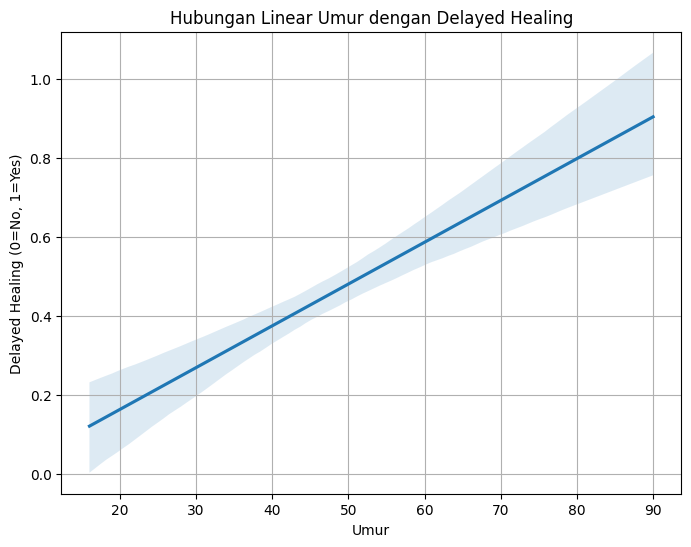

In [22]:
plt.figure(figsize=(10,6))

# Ubah delayed_healing menjadi numerik (Yes=1, No=0)
df_eda['delayed_healing_numeric'] = df_eda['delayed_healing'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(8,6))

#Membuat scatter plot
sns.regplot(
    x='age',
    y='delayed_healing_numeric',
    data=df_eda,
    scatter=False,  # agar titik tidak ditampilkan
)
#tampilkan plot hubungan umur dengan delay healing
plt.xlabel('Umur')
plt.ylabel('Delayed Healing (0=No, 1=Yes)')
plt.title('Hubungan Linear Umur dengan Delayed Healing')
plt.grid(True)
plt.show()


    Kesimpulan : 
    Dari line plot diatas juga menguatkan ada hubungan linear antara umur dan delay healing. Semakin tua umur (sumbu x) semakin beresiko mengalami delay healing(sumbu y). Itu terlihat dari line yang terus meningkat perlahan sejalan dengan umur pasien yang bertambah. Lalu berdasarkan hasil dari cohen d, kekuatan hubungannya sedang jadi ada faktor lain yang mempengaruhi delay healing selain umur. Maka dari itu bisa jadi kesimpulan juga bukan hanya positif diabetes yang menyebabkan penyembuhan luka lambat, tapi umur juga berpengaruh.

## 4.5. Melihat Orang yang positif diabetes tapi tanpa gejala

/var/folders/lt/mry2bd690g39fx99l_453m8c0000gn/T/ipykernel_2294/1640950015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positif['total_gejala'] = df_positif.apply(count_yes, axis=1)


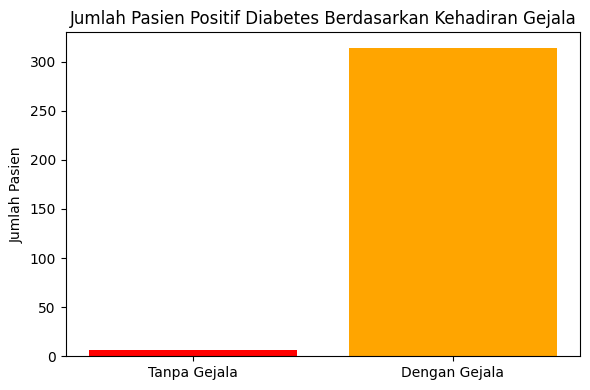

In [23]:
gejala_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush',
               'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
               'muscle_stiffness', 'alopecia', 'obesity']

# Fungsi untuk menghitung jumlah 'Yes' pada kolom gejala per baris menggunakan if-else
def count_yes(row):
    count = 0
    for col in gejala_cols:
        if row[col] == 'Yes':
            count += 1
    return count

# Hitung total gejala untuk setiap pasien positif diabetes
df_positif['total_gejala'] = df_positif.apply(count_yes, axis=1)

# Hitung jumlah pasien tanpa gejala (total_gejala == 0)
tanpa_gejala_count = df_positif[df_positif['total_gejala'] == 0].shape[0]

# Hitung jumlah pasien dengan gejala (total_gejala > 0)
dengan_gejala_count = df_positif[df_positif['total_gejala'] > 0].shape[0]

# Siapkan data untuk plotting
counts = [tanpa_gejala_count, dengan_gejala_count]
labels = ['Tanpa Gejala', 'Dengan Gejala']

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['red', 'orange'])
plt.title('Jumlah Pasien Positif Diabetes Berdasarkan Kehadiran Gejala')
plt.ylabel('Jumlah Pasien')
plt.tight_layout()
plt.show()

    Dari diagram di atas bisa saya simpulkan ternyata ada juga pasien yang positif diabetes tanpa gejala, tapi jumlahnya sangat sedikit sekali.    

## 4.6. Jumlah orang yang positif diabetes mengalami gejala sering buang air kecil (Polyuria) dan haus yang berlebihan (Polydipsia)

In [24]:
#Menghitung total positif diabetes dan di urutkan berdasarkn polyuria dan polydipsia
total_positif = df_positif.shape[0]
polyuria_polydipsia_count = df_positif[(df_positif['polyuria'] == 'Yes') & (df_positif['polydipsia'] == 'Yes')].shape[0]
print(f"Jumlah Pasien positif diabetes dengan gejala Polyuria dan Polydipsia adalah {polyuria_polydipsia_count} dari {total_positif}")

Jumlah Pasien positif diabetes dengan gejala Polyuria dan Polydipsia adalah 193 dari 320


Text(0, 0.5, 'Jumlah Pasien')

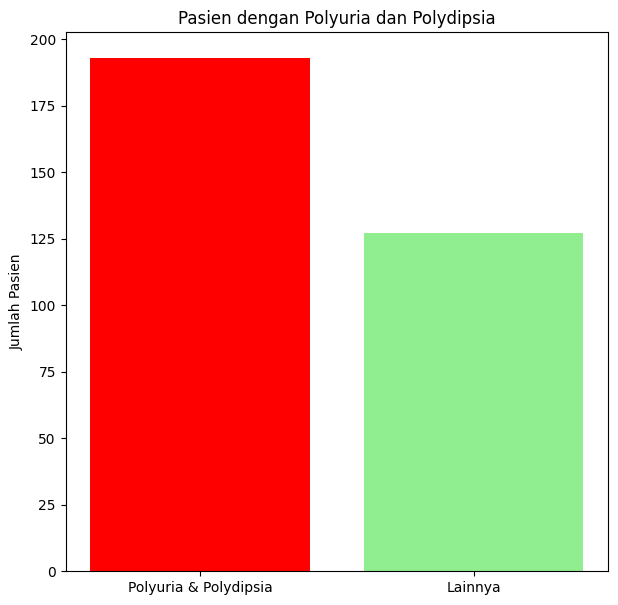

In [25]:
#Membuat plot bar
plt.figure(figsize=(7,7))
plt.bar(['Polyuria & Polydipsia', 'Lainnya'], [polyuria_polydipsia_count, df_positif.shape[0]-polyuria_polydipsia_count], color=['red','lightgreen'])
plt.title('Pasien dengan Polyuria dan Polydipsia')
plt.ylabel('Jumlah Pasien')

    Dari bar diagram diatas saya ambil insight bahwa ternyata poyuria dan polydipsia menjadi salah dua gejala yang menandakan pasien positif diabetes

## 4.7. Gejala yang paling sering ditemui saat seorang terindikasi positif diabetes

In [26]:
#Melihat gejala yang sering ditemui pada penderita diabetes
gejala_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush',
               'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
               'muscle_stiffness', 'alopecia', 'obesity']
#Mengurutkan frekuensi gejala yang positif diabetes, dari gejala paling banyak 
frekuensi_gejala = df_positif[gejala_cols].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False)

frekuensi_gejala

polyuria              243
polydipsia            225
weakness              218
partial_paresis       192
polyphagia            189
sudden_weight_loss    188
visual_blurring       175
itching               154
delayed_healing       153
muscle_stiffness      135
irritability          110
genital_thrush         83
alopecia               78
obesity                61
dtype: int64

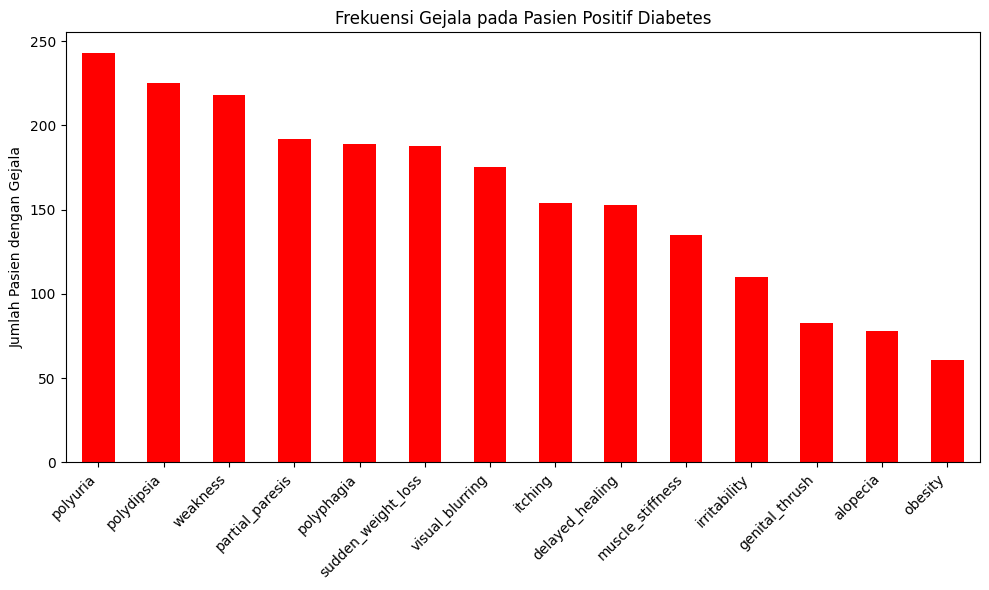

In [27]:
#Membuat plot frekuensi gejala
plt.figure(figsize=(10,6))
frekuensi_gejala.plot(kind='bar', color='red')
plt.title('Frekuensi Gejala pada Pasien Positif Diabetes')
plt.ylabel('Jumlah Pasien dengan Gejala')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

    Dari hasil diatas saya simpulkan ada 5 gejala yang paling tinggi atau sering muncul pada pasien positif diabetes, yaitu :  

    1. polyuria (kondisi sering buang air kecil) = 243 pasien  
    2. polydipsia (rasa haus yang berlebihan) =  225 pasien  
    3. weakness (kondisi fisik yang melemah) = 218 pasien
    4. partial paresis (melemah atau lumpuhnya otot) = 192 pasien
    5. polypaghia (rasa lapar atau nafsu makan yang berlebihan) = 189 pasien  

    Lalu ternyata gejala obesitas menjadi gejala yang paling rendah bagi orang yang positif diabetes

# **BAB 5 Feature Enginerring**

    Pada tahap ini saya akan melakukan beberapa transformasi data agar menjadi fitur-fitur yang memudahkan model dalam belajar dan membuat prediksi.

## 5.1. Check cardinality

    Pada tahap ini saya akan mengecek cardinality pada kolom kategorikal. Disini saya akan hanya mengambil yang low cardinality dengan alasan :  
    
    1. Memudahkan machine learning dalam mengolah datanya
    2. Mencegah terjadinya overfitting karena kalau high cardinality bisa jadi model malah akan menghafal datanya

In [28]:
#Check Cardinality

pd.set_option('display.max_colwidth', None) #max_colwitdth akan memaksimalkan kolom jadi ngk kepotong

cat_cols_df = list(df.select_dtypes(include='object').columns) #list semua kolom yang tipe datanya object

listItem = [] #Membuat list kosong
for col in cat_cols_df:
  '''method untuk cek unique value pada kolom kategorikal di X_train'''
  listItem.append([col, df[col].nunique(), df[col].unique()]) #Memasukkan value yang unik ke list kosong disini

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem) #Convert hasil yang dalam bentuk list ke dataframe

,nama kolom,jumlah nilai unique,nilai unique
0,gender,2,"[Male, Female]"
1,polyuria,2,"[No, Yes]"
2,polydipsia,2,"[Yes, No]"
3,sudden_weight_loss,2,"[No, Yes]"
4,weakness,2,"[Yes, No]"
5,polyphagia,2,"[No, Yes]"
6,genital_thrush,2,"[No, Yes]"
7,visual_blurring,2,"[No, Yes]"
8,itching,2,"[Yes, No]"
9,irritability,2,"[No, Yes]"


    Dari hasil check cardinality di atas saya dapatkan semua kolom kategorikalnya adalah low cardinality, jadi tidak perlu saya drop.

## 5.2. Split Dataset

    Pada tahap ini saya akan split dataset antara fitur dan target

In [29]:
# Splitting dataset antara menjadi Fitur dan Target
X = df.drop(['class'], axis=1) # fitur
y = df['class'] # target

In [30]:
#Cek fitur dan target
X.head() #cek fitur

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [31]:
y.head() #cek target

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: class, dtype: object

    Dataset telah ter-split menjadi Fitur dan Target. Setelah itu saya akan split Dataset menjadi Dataset Train dan Dataset Test dengan perbandingan 80-20. Supaya Dataset Test punya jumlah data yang tidak terlalu sedikit.

In [32]:
#Split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (416, 16)
Test Size (104, 16)


    Dari info diatas dataset telah di split dimana :
    
    1. Dataset Train (Fitur) berjumlah 416 baris dan 16 kolom
    2. Dataset Test (Fiture) berjumlah 104 baris dan 16 kolom

## 5.3. Handle Missing Values

    Missing value sebenarnya telah di check di BAB 3 Data Loading, akan tetapi kita akan double check lagi apakah betul-betul tidak ada missing value.

In [33]:
#Cek missing value pada X_train
X_train.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [34]:
#Cek missing value pada X_test
X_test.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [35]:
#Cek missing value pada y_train
y_train.isnull().sum()

np.int64(0)

In [36]:
#Cek missing value pada y_test
y_test.isnull().sum()

np.int64(0)

    Dari dataset train dan test saya terlihat TIDAK ADA MISSING VALUE

## 5.4. Handle Outliers

    Sebelum menentukan outlier saya akan melihat skewness pada kolom numerik. Dari dataset ini saya liat hanya ada 1 kolom numerik yaitu 'age'

In [37]:
#cek info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 63 to 32
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 416 non-null    int64 
 1   gender              416 non-null    object
 2   polyuria            416 non-null    object
 3   polydipsia          416 non-null    object
 4   sudden_weight_loss  416 non-null    object
 5   weakness            416 non-null    object
 6   polyphagia          416 non-null    object
 7   genital_thrush      416 non-null    object
 8   visual_blurring     416 non-null    object
 9   itching             416 non-null    object
 10  irritability        416 non-null    object
 11  delayed_healing     416 non-null    object
 12  partial_paresis     416 non-null    object
 13  muscle_stiffness    416 non-null    object
 14  alopecia            416 non-null    object
 15  obesity             416 non-null    object
dtypes: int64(1), object(15)
memory 

In [38]:
#Melihat skewness pada fitur numerik
Cek_skewness_X_train = X_train['age'].skew()
#Kalau lebih besar dari 0.05 dan kurang dari -0.05 skew
if Cek_skewness_X_train >= 0.05 and Cek_skewness_X_train <= -0.05 :
    print ("skew")
else :
    print ("normal")

normal


    Dari hasil cek skewness diatas berarti fitur 'age' normal, maka dari itu tidak perlu penanganan Outliers.

## 5.5. Split Categorical Column and Numerical Column

    Saya akan split kolom menjadi berdasarkan kategorikal dan numerikalnya. Karena nanti di Fitur Numerikal akan di scalling dan Fitur Kategorikal akan di encoding.

In [39]:
#Split Kolom Numerikal dan Kategorikal
num_columns_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns_X = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print (num_columns_X)
print (cat_columns_X)

['age']
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


    Fitur Kategorikal telah di split

## 5.6. Feature Selection

In [40]:
#Melihat skew fitur numerikal ('age')
X['age'].skew()

np.float64(0.3293593578272701)

    Pada tahap ini saya akan melakukan seleksi fitur dimana saya akan melihat korelasi fitur dengan target. Untuk melihat korelasinya saya menggunakan :  
    1. Metode T-test pada fitur numerikal (age) dengan target categorikal (positive/negative)
    2. Metode Chi-Square pada fitur kategorikal dengan target kategorikal (positive/negative)

In [41]:
#Cek korelasi fitur numerik dengan target

from scipy.stats import ttest_ind
import pandas as pd

num_column = num_columns_X[0]  # ambil nama kolom tunggal dari list

#Mengelompokkan negative dan positif diabetes
group_negatif = X_train.loc[y_train == 'Negative', num_column]
group_positif = X_train.loc[y_train == 'Positive', num_column]

if len(group_negatif) > 0 and len(group_positif) > 0: #Mengecek di dalam kelompok negatif dan positif ada yang kosong ngk, kalau ngk ada ngk bisa uji t test dibawah
    stat, p_value = ttest_ind(group_negatif, group_positif, equal_var=False) #uji t-test
    interpretasi = f'Perbedaan signifikan (p={p_value:.4f}), t-stat: {stat:.3f}' if p_value < 0.05 else f'Tidak signifikan (p={p_value:.4f}), t-stat: {stat:.3f}'
else:
    interpretasi = 'Data tidak cukup di salah satu grup'
    p_value = None

hasil_korelasi = pd.DataFrame({
    'Fitur Numerikal': [num_column],
    'Interpretasi': [interpretasi],
    'p-value': [p_value]
})

hasil_korelasi


,Fitur Numerikal,Interpretasi,p-value
0,age,"Tidak signifikan (p=0.0723), t-stat: -1.803",0.07231


    Dari hasil diatas bisa saya ambil insight :  
    1. t stats = -1.8 menandakan rata-rata umur untuk yang positif diabetes lebih rendah dengan rata-rata umur yang negatif diabetes
    2. p value > 0.05 menandakan tidak ada bukti kalau umur yang positif diabetes dan negatif diabetes berbeda secara signifikan  
    3. Tidak ada perbedaan yang significan antara class Positive dan Negative berdasarkan umur

    Berdasarkan hasil saya akan tetap menggunakan fitur age ini dengan alasan :  
    1. Biasanya di dalam konteks medis atau kesehatan umur bisa relevan dengan kondisi pasien, contoh : setelah umur 30 tahun, massa otot mulai menyusut per tahun-nya. 
Sumber : https://kumparan.com/kumparanmom/massa-otot-menyusut-sejak-usia-30-tahun-yuk-perhatikan-ini-moms-23F2kz3V66p    

    2. Semakin tua orang juga ada kemungkinan bisa kena terkena diabetes  
Sumber : https://www.alodokter.com/ketahui-faktor-risiko-diabetes-dan-cara-mengendalikannya  
    
    3. Supaya model tidak hanya mengandalkan fitur kategorikal saja  
    4. Bisa jadi model seperti random forest dan boosting bisa menangkap pola yang tidak linear

In [42]:
def cramers_v(confusion_matrix):
    '''Fungsi ini digunakan untuk menghitung nilai Cramer's V,
    yaitu ukuran kekuatan asosiasi antara dua variabel kategori
    berdasarkan tabel kontingensi (confusion matrix).'''
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


p_values_cat = []
signifikan_cat = []
cols_cat = []
cramers_v_values = []

for col in cat_columns_X:
    # Buat tabel kontingensi antara fitur kategori saat ini dengan target (y)
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Cek apakah tabel kontingensi memiliki minimal 2 baris dan 2 kolom
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        # Lakukan uji chi-square untuk cari tau hubungan antara fitur dan target (y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Simpan nilai p-value dan nama fitur kategori
        p_values_cat.append(p_value)
        cols_cat.append(col)
        
        # Tentukan apakah hubungan signifikan berdasarkan p-value < 0.05
        if p_value < 0.05:
            signifikan_cat.append('Perbedaan signifikan')
        else:
            signifikan_cat.append('Tidak signifikan')

        # Hitung Cramer's V
        cv = cramers_v(contingency_table)
        cramers_v_values.append(cv)
    else:
        #Kalau variasinya kurang isi dengan none / print "data tidak cukup variasi"
        p_values_cat.append(None)
        cols_cat.append(col)
        signifikan_cat.append('Data tidak cukup variasi')
        cramers_v_values.append(None)

#Kalau berhasil masukin datanya ke sini
hasil_cat = pd.DataFrame({
    'Nama Fitur': cols_cat,
    'Hubungan': signifikan_cat,
    'p-value': p_values_cat,
    "Cramers' V": cramers_v_values
})
hasil_cat



,Nama Fitur,Hubungan,p-value,Cramers' V
0,gender,Perbedaan signifikan,7.031335e-20,0.445333
1,polyuria,Perbedaan signifikan,6.566118e-39,0.638590
2,polydipsia,Perbedaan signifikan,2.494900e-37,0.624797
3,sudden_weight_loss,Perbedaan signifikan,6.542496e-19,0.433243
4,weakness,Perbedaan signifikan,1.226955e-05,0.208948
5,polyphagia,Perbedaan signifikan,6.195205e-11,0.317201
6,genital_thrush,Tidak signifikan,9.107506e-02,0.066819
7,visual_blurring,Perbedaan signifikan,1.428893e-06,0.231491
8,itching,Tidak signifikan,4.426153e-01,0.000000
9,irritability,Perbedaan signifikan,6.457176e-07,0.239318


    Dari hasil korelasi di atas saya akan mengambil keputusan : 

    Mempertahankan semua fitur yang tidak signifikan karena menurut beberapa artikel faktor - faktor yang tidak signifikan ini bisa jadi gejala diabetes.
referensi :   
                        - https://www.alodokter.com/gejala-diabetes-pada-wanita-yang-harus-diwaspadai  
                        - https://www.alodokter.com/11-gejala-diabetes-pada-kulit-yang-perlu-diketahui  
                        - https://aido.id/health-articles/obesitas-menjadi-faktor-pemicu-penyakit-diabetes/detail  
                        - https://www.halodoc.com/artikel/ini-alasan-luka-lebih-susah-sembuh-pada-pengidap-diabetes  
                        - https://www.halodoc.com/artikel/diabetes-mellitus-dan-gangguan-muskuloskeletal
    
    Saya juga akan mempertahankan fitur yang hubungannya signifikan tapi kekuatan hubungannya lemah karena :
    1. Diabetes itu penyakit yang tidak langsung kronis, karena fokusnya untuk deteksi diabetes tahap awal maka bisa jadi yang hubungannya lemah merupakan faktor gejala awal
    2. Bisa jadi yang gejala hubungannya lemah terjadi pada pasien tertentu di case tertentu
    
referensi :  
                        -  https://jik.stikesalifah.ac.id/index.php/jurnalkes/article/download/52/pdf  
                        -  https://ciputrahospital.com/berat-badan-penderita-diabetes-turun-drastis-ini-cara-mengatasi-kurus-karena-diabetes/  
                        -  https://www.alodokter.com/komunitas/topic/lemas-karena-diabetes  
                        -  https://health.grid.id/read/353596036/inilah-polifagia-tanda-awal-diabetes-tipe-2-yang-sering-terabaikan?page=all  
                        -  https://www.alodokter.com/waspadai-penyakit-mata-pada-penderita-diabetes  
                        -  https://www.mitrakeluarga.com/artikel/penyebab-diabetes-melitus-di-usia-muda  
                        -  https://www.tempo.co/gaya-hidup/penyebab-otot-lemah-pada-pasien-diabetes-515445  
                        -  https://hellosehat.com/diabetes/tipe-2/rambut-rontok-karena-diabetes/

## 5.6. Encoding

    - Feature Encoding akan dilakukan di pipeline
    - Saya akan menggunakan ordinal encoder  di kolom kategorikal kecuali gender karena semua value kolom berupa "Yes" or "No", yaitu ada gejala atau tidak. Dimana label encoding akan encode berdasarkan abjad (No menjadi 0 dan Yes menjadi 1 ) karena abjad N lebih dulu dari Y
    - Lalu untuk gender saya akan menggunakan OneHotEncoding, karena gender bertipe kategorikal nominal (female dan male itu setara)

    Dibagian ini saya juga akan melakukan target encoding. Karena algoritma Boost memerlukan target dalam bentuk angka. Itu akan saya lakukan disini (diluar pipeline) karena pipeline diperuntukkan hanya untuk fitur. Untuk metode encodingnya saya menggunakan LabelEncoder dimana metode ini mengubah string menjadi angka 0,1,2 dan seterusnya berdasarkan abjad. Karena value di target itu Positive dan Negative maka sudah sesuai. Positive akan menjadi 1 dan Negative akan menjadi 0 (Karena Negative secara abjad lebih dulu dari Positive).

In [43]:
#target encoding dengan Label encoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # fit dan transform pada train
y_test_encoded = le.transform(y_test)        # hanya transform pada test

## 5.7. Scalling

    Feature Scalling akan di lakukan juga di pipeline. Saya akan menggunakan standard scaller dengan alasan :  
    1. Kolom numerik skewnessnya normal  
    2. Agar preprocessing menjadi lebih konsisten  
    3. Membuat model lebih stabil dalam membaca fitur

## 5.8. Pipeline

    Disini saya akan melakukan pembuatan pipeline untuk encoding dan scalling lalu akan digabungkan menggunakan ColumnTransformer

In [44]:
#Membuat Pipeline

# Definisikan nama kolom
num_column_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist() 
cat_column_X = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Pisahkan kolom Yes/No dari kolom kategorikal lain
yes_no_columns = ['polyuria', 'polydipsia', 'sudden_weight_loss', 
                  'weakness', 'polyphagia', 'genital_thrush', 
                  'visual_blurring', 'itching', 'irritability', 
                  'delayed_healing', 'partial_paresis', 'muscle_stiffness', 
                  'alopecia', 'obesity']
onehot_cat_columns = list(set(cat_column_X) - set(yes_no_columns))  # kolom kategorikal selain Yes/No

# Gabungkan semua preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_columns_X),
    ('cat', OneHotEncoder(handle_unknown='ignore'), onehot_cat_columns),
    ('yes_no', OrdinalEncoder(categories=[['No', 'Yes']] * len(yes_no_columns)), yes_no_columns)
])

# **BAB 6 Model Definition**

    Pada bagian ini saya akan mendefinisikan model dengan beberapa aspek, yaitu : 
    - Dataset
    - Problem
    - Model
    - Hyperparameter

    1. DATASET
    Dataset yang saya gunakan adalah 'Early Stage Diabetes Risk Prediction' dari archive.ics.uci.edu dengan link dibawah ini :
[LINK DATASET](https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset)

    Dataset ini berisi gejala-gejala pada pasien yang terindikasi positive diabetes early stage. Dataset ini terdiri dari campuran numerikal dan kategorikal dimana mayoritasnya adalah kategorikal.

    2. PROBLEM
    Masalah yang ingin saya selesaikan adalah memprediksi apakah seseorang menderita diabetes tahap awal dengan menggunakan machine learning. Jadi sebelum orang tersebut cek lebih dalam ke laboratorium, mereka bisa menggunakan machine learning ini yang akan disediakan di website Rumah Sakit Nasional. Targetnya adalah 0 dan 1, dimana 0 = Negative dan 1 = Positif.

    3. MODEL
    Saya akan menggunakan 5 Algoritma pada pemodelan ini, algoritmanya adalah 
     - KNN 
         * Model ini sederhana dengan mencari tetangga terdekat (nearest neighbors) berdasarkan mayoritas dari tetangga
         * Parameter Default

     - SVM
         * Model ini dapat menangani data linear maupun non linear dengan mencari hyperplane (batas yang memisahkan kelas) dengan margin yang paling besar.
         * Parameter Default
     
     - Decision Tree
         * Model ini mudah di visualisasikan dengan membuat pohon keputusan berdasarkan gin impurity (fitur yang paling informatif)
         * Parameter Default
    
     - Random Forest
         * Gabungan dari banyak decision tree biar hasil lebih stabil dan mencegah overfit
         * Parameter Default
    
     - XGBoost
         * Model boosting yang cepat dibanding Model boosting yang lain dimana cara kerjanya adalah memperbaiki kesalahan pada model sebelumnya secara bertahap
         * Parameter Default
    
    Pada semua model saya akan menggunakan classification matrix recall, karena pada kasus disini saya ingin mengurangi False Negatif. False Negatif adalah kondisi dimana model mendeteksi bahwa pasien negatif diabetes padahal positif. Kondisi ini harus sangat diminimalisir pada model saya, karena itu beresiko besar kepada pasien. Maka dari itu saya harus memaksimalkan model mengedeteksi recall pada kelas positif (1).

    4. Hyperparameter Tuning
    Hyperparameter tuning akan dilakukan setelah saya memilih model terbaik. Saya akan menggunakan Grid Search karena data saya tidak terlalu besar.
    
    


## Membuat Pipeline untuk Model

In [45]:
# KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', KNeighborsClassifier())])

In [46]:
# SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', SVC(probability=True, random_state=42))])

In [47]:
# Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [48]:
# Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
# XGBoost Boosting
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

pipeline_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# **BAB 7 Model Training**

    Pada tahap ini saya akan melakukan fit/model training pada Data Train

## KNN

In [50]:
#Training pada data Train
pipeline_knn.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', KNeighborsClassifier())])

## SVM

In [51]:
#Training pada data Train
pipeline_svm.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', SVC(probability=True, random_state=42))])

## Decision Tree

In [52]:
#Training pada data Train
pipeline_dt.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Random Forest

In [53]:
#Training pada data Train
pipeline_rf.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## XGBoost

In [54]:
#Training pada data Train
pipeline_xgb.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

# BAB 8 Model Evaluation

## 8.1. K-Fold Cross-Val

    Pada Cross_Val saya akan menggunakan StratifiedKFold supaya proporsi kelas target (0 dan 1) seimbang ketika di fold. Lalu untuk n-splitnya saya menggunakan 3 bukan 5 karena ukuran dataset yang tidak besar. Sehingga kalau 3, model bisa dilatih dengan lebih banyak data daripada di fold 5.

In [55]:
#Fold dengan StratifiedKFold
Fold = StratifiedKFold(n_splits=3)

In [56]:
#Melakukan cross validation pada model KNN sebanyak 3 fold dengan scoringnya recall 
scoresModel_KNN= cross_val_score(pipeline_knn, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores KNN:", scoresModel_KNN)
print("Rata-rata Accuracy KNN:", scoresModel_KNN.mean())
print("Standar Deviasi Accuracy KNN:", scoresModel_KNN.std())
print("-" * 100)

#Melakukan cross validation pada model SVM sebanyak 3 fold dengan scoringnya recall 
scoresModel_SVM= cross_val_score(pipeline_svm, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores SVM:", scoresModel_SVM)
print("Rata-rata Accuracy SVM:", scoresModel_SVM.mean())
print("Standar Deviasi Accuracy SVM:", scoresModel_SVM.std())
print("-" * 100)

#Melakukan cross validation pada model Decision Tree sebanyak 3 fold dengan scoringnya recall 
scoresModel_DT= cross_val_score(pipeline_dt, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores Decision Tree:", scoresModel_DT)
print("Rata-rata Accuracy Decision Tree:", scoresModel_DT.mean())
print("Standar Deviasi Accuracy Decision Tree:", scoresModel_DT.std())
print("-" * 100)

#Melakukan cross validation pada model Random Forest sebanyak 3 fold dengan scoringnya recall 
scoresModel_RF= cross_val_score(pipeline_rf, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores Random Forest:", scoresModel_RF)
print("Rata-rata Accuracy Random Forest:", scoresModel_RF.mean())
print("Standar Deviasi Accuracy Random Forest:", scoresModel_RF.std())
print("-" * 100)

#Melakukan cross validation pada model XGBoost sebanyak 3 fold dengan scoringnya recall 
scoresModel_XGB= cross_val_score(pipeline_xgb, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores XGBoost:", scoresModel_XGB)
print("Rata-rata Accuracy XGBoost:", scoresModel_XGB.mean())
print("Standar Deviasi Accuracy XGBoost:", scoresModel_XGB.std())
print("-" * 100)

Cross Validation Accuracy Scores KNN: [0.89534884 0.81176471 0.90588235]
Rata-rata Accuracy KNN: 0.8709986320109439
Standar Deviasi Accuracy KNN: 0.04210488682543425
----------------------------------------------------------------------------------------------------
Cross Validation Accuracy Scores SVM: [0.97674419 0.92941176 0.92941176]
Rata-rata Accuracy SVM: 0.9451892384860922
Standar Deviasi Accuracy SVM: 0.02231271739995851
----------------------------------------------------------------------------------------------------
Cross Validation Accuracy Scores Decision Tree: [0.94186047 0.83529412 0.96470588]
Rata-rata Accuracy Decision Tree: 0.9139534883720931
Standar Deviasi Accuracy Decision Tree: 0.05639710822564734
----------------------------------------------------------------------------------------------------
Cross Validation Accuracy Scores Random Forest: [0.97674419 0.92941176 0.96470588]
Rata-rata Accuracy Random Forest: 0.956953944368445
Standar Deviasi Accuracy Random Fo

    Dari hasil Cross-Validation dari 5 Model diatas urutan terbaiknya adalah :  

    1. Random Forest memiliki akurasi tertinggi di 0.956 dan Standard Deviasinya rendah di 0.020
    2. SVM akurasinya juga tinggi, diurutan kedua, yaitu di 0.945 dan Standard Deviasinya juga rendah, di angka 0.022
    3. XGBoost ada diurutan ketiga dimana akurasinya di 0.941, itu tinggi juga. Standard Deviasinya di 0.016 dimana paling kecil dari semua model
    4. Decision Tree ada di urutan ke-empat dimana rata-rata akurasinya ada di 0.91 dan Standard Deviasinya di 0.05
    5. KNN performanya paling rendah (rata2 akurasi di 0.87)

## 8.2. Classification Matrix

In [57]:
# List of models and their pipeline names
models = {
    'KNN': pipeline_knn,
    'SVM': pipeline_svm,
    'Decision Tree': pipeline_dt,
    'Random Forest': pipeline_rf,
    'XGBoost': pipeline_xgb
}

# Initialize dictionaries to store recall scores for train and test
recall_train = {}
recall_test = {}

for model_name, pipeline in models.items():
    # Predict on train and test sets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Generate classification reports as dict
    report_train = classification_report(y_train_encoded, y_pred_train, output_dict=True)
    report_test = classification_report(y_test_encoded, y_pred_test, output_dict=True)
    
    # Extract recall values excluding 'accuracy', 'macro avg', 'weighted avg'
    recall_train[model_name] = {k: v['recall'] for k, v in report_train.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}
    recall_test[model_name] = {k: v['recall'] for k, v in report_test.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}

# Create DataFrames from recall dictionaries
df_recall_train = pd.DataFrame.from_dict(recall_train, orient='index')
df_recall_train.columns = ['Recall 0', 'Recall 1']
df_recall_test = pd.DataFrame.from_dict(recall_test, orient='index')
df_recall_test.columns = ['Recall 0', 'Recall 1']

In [58]:
#Lihat recall pada data train
df_recall_train

,Recall 0,Recall 1
KNN,0.97500,0.949219
SVM,0.96875,0.996094
Decision Tree,1.00000,1.000000
Random Forest,1.00000,1.000000
XGBoost,1.00000,1.000000


In [59]:
#Lihat recall pada data test
df_recall_test

,Recall 0,Recall 1
KNN,0.975,0.890625
SVM,0.975,0.984375
Decision Tree,1.000,0.968750
Random Forest,0.975,0.984375
XGBoost,1.000,0.968750


    Karena fokus saya adalah mengurangi False Negatif maka saya akan memaksimalkan Metrix Recall Kelas 1 (Positive Diabetes). Dari hasil diatas saya akan urutkan dari hasil yang terbaik :

    1. Random Forest, recall kelas 1 pada data train =  1 dan pada data test = 0.984
    2. Decision Tree, recall kelas 1 pada data train = 1 dan pada data test =  0.969
    3. XGBoost, recall kelas 1 pada data train = 1 dan pada data test = 0.969
    4. SVM, recall kelas 1 pada data train = 0.996 dan pada data test = 0.984
    5. KNN, rcall kelas 1 pada data train = 0.949 dan pada data test = 0.890


    Dari Hasil Cross-Val dan Classification Matrix saya akan menggunakan Model Random Forest Karena :

    1. RECALL-nya tertinggi pertama dan CROSS-VAL nya juga tertinggi pertama
    2. Standard Deviasi termasuk yang ter-rendah
    3. Saya akan adjust menggunakan hyperparameter karena recall yang menyentuh kelas 1, terindikasi overfit walaupun bedanya cuma sedikit sekali dengan data test (beda 0.02)
    4. Saya tidak akan menggunakan SVM walaupun nilai recallnya tidak menyentuh 1, karena saya udah coba untuk di inference, SVM terlalu overfit walaupun sudah di adjust dengan hyperparamter

    Sebelum saya adjust menggunakan hyperparameter saya akan melihat hasil predict dari model terbaik yaitu 'Random Forest'

In [60]:
#Random Forest
y_pred_RF_train = pipeline_rf.predict(X_train)
y_pred_RF_test = pipeline_rf.predict(X_test)

# Confusion Matrix Random Forest
# Train Set
cm_rf_train = confusion_matrix(y_train_encoded, y_pred_RF_train)  
# Test Set
cm_rf_test = confusion_matrix(y_test_encoded, y_pred_RF_test)  

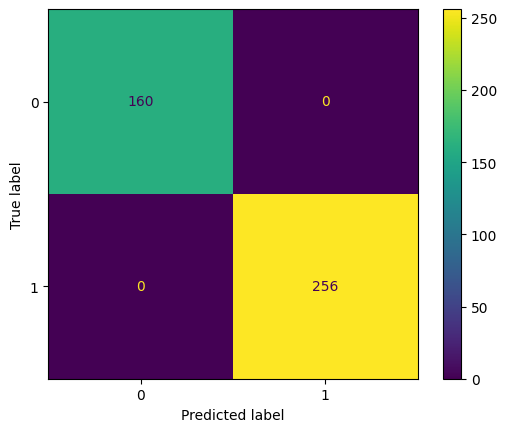

In [61]:
# Confusion Matrix Data Train - Display
ConfusionMatrixDisplay(cm_rf_train).plot()

    Dari hasil predict visualisasi data train diatas saya ambil kesimpulan :
    
    1. Hasil predict pada data train berhasil 100 % memprediksi True Positif dan True Negatif
    2. Hasil predict pada data train juga berhasil 100 % menghindari False Negatif, dimana False negatif adalah target kita untuk di minimalisir.
    3. Hasil predict pada data train juga berhasil 100 % menghindari False Positif

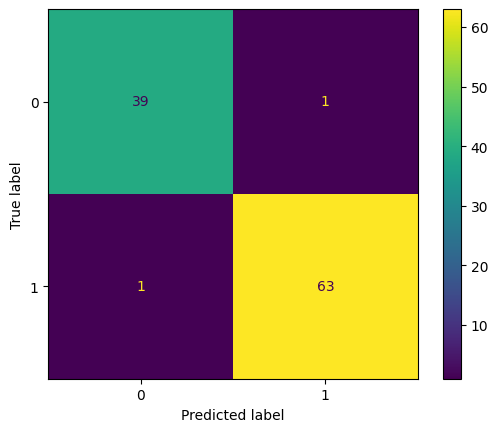

In [62]:
# Confusion Matrix Data Test - Display
ConfusionMatrixDisplay(cm_rf_test).plot()

    Dari hasil predict visualisasi data test diatas saya ambil kesimpulan :
    
    1. Hasil predict pada data test berhasil 99 % memprediksi True Positif dan True Negatif
    2. Hasil predict pada data test juga sudah meminimalir False Negatif (Tujuan Saya), yang hanya berjumlah 1 data
    3. Hasil predict pada data test juga berhasil meminimalisir False Positif yang hanya berjumlah 1 data

# BAB 9 Hyperparameter Tuning

    Pada tahap ini saya akan melakukan hyper-parameter-tuning pada model terbaik, yaitu random forest. Saya melakukan disini bukan bertujuan untuk membuat model lebih bagus tapi mengurangi recallnya agar tidak menyentuh 1 (overfit)

### Random Forest

In [63]:
#Cek pipeline random forest
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('yes_no',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['polyuria', 'polydipsia',
                                                   'sudden_weight_loss',
                                                   'weakness', 'polyphagia',
                                                   'genital_thrush',
                                                   'visual_blurring', 'itching',
                                                   'irritability',
                                                   'delayed_healing',
                                                   'partial_paresis',
                                                   'muscle_stiffness',
                                                   'alopecia', 'obesity'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [64]:
#Menentukan parameternya
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, 15, 20], 
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

    Alasan menggunakan parameter diatas :  

    1. 100 adalah batas minimal jumlah decision tree supaya model tidak underfit dan 200 batas maksimal supaya tidak terlalu overfit  
    2. Saya membatasi kedalaman pohon hanya sampai 20, supaya bisa mengadjust recall lebih rendah lagi.
    3. Minimum sampel di 15 sebelum cabang pecah lagi. Supaya tidak terlalu banyak cabang dan membuat tumbuh terlalu spesik.
    4. Minimum daun di 2 karena kalau terlalu sedikit bisa terlalu spesifik juga.
    5. Membatas fitur yang di pilih tiap split, jadi ngk semua fitur.
    6. Value "True" meningkatkan perbedaan tiap pohon, jadi aneka ragam
    7. Kelas 1 dan 0 tidak balance makanya saya membatasi dengan balanced dan balanced_subsample

In [65]:
# StratifiedKFold untuk menjaga distribusi kelas
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV untuk Random Forest
rf_gridcv = GridSearchCV(estimator=pipeline_rf,
                         param_grid=param_grid_rf,
                         cv=cv,
                         scoring='recall',
                         n_jobs=-1
                         )

# Training model
rf_gridcv.fit(X_train, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender']),
                                                                        ('yes_no',
                                                                         OrdinalEncoder(categories=[['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes'],
                                                                                                    ['No',
                                                                                                     'Yes...
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__class_weight': ['balanced',
                                                      'balanced_subsample'],
                         'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [2, 4, 6],
                         'classifier__min_samples_split': [5, 10, 15],
                         'classifier__n_estimators': [100, 200]},
             scoring='recall')

In [66]:
# Hasil terbaik
rf_gridcv.best_params_

{'classifier__bootstrap': True,
 'classifier__class_weight': 'balanced',
 'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [67]:
# Cek best scorenya
rf_gridcv.best_score_

np.float64(0.956862745098039)

In [68]:
#Mengambil model terbaik dan memasukkannya ke variable baru
rf_gridcv_best = rf_gridcv.best_estimator_

In [69]:
# Check performa model di train dan test set setelah di Hyperparameter Tuning
y_pred_rf_train_tuning = rf_gridcv_best.predict(X_train)
y_pred_rf_test_tuning = rf_gridcv_best.predict(X_test)

print("Classification Report After Tuning (Data Train) - Random Forest:")
print(classification_report(y_train_encoded, y_pred_rf_train_tuning))
print("-" * 70)
print("Classification Report After Tuning (Data Test) - Random Forest:")
print(classification_report(y_test_encoded, y_pred_rf_test_tuning))


Classification Report After Tuning (Data Train) - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       160
           1       0.99      0.98      0.99       256

    accuracy                           0.99       416
   macro avg       0.98      0.99      0.98       416
weighted avg       0.99      0.99      0.99       416

----------------------------------------------------------------------
Classification Report After Tuning (Data Test) - Random Forest:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



In [70]:
#Evaluasi model di data train sebelum di hyperparameter tuning
df_recall_train

,Recall 0,Recall 1
KNN,0.97500,0.949219
SVM,0.96875,0.996094
Decision Tree,1.00000,1.000000
Random Forest,1.00000,1.000000
XGBoost,1.00000,1.000000


In [71]:
#Sebelum di hyperparameter tuning
df_recall_test

,Recall 0,Recall 1
KNN,0.975,0.890625
SVM,0.975,0.984375
Decision Tree,1.000,0.968750
Random Forest,0.975,0.984375
XGBoost,1.000,0.968750


    Dari hasil Tuning saya mendapatkan perbedaan yaitu, 
    
    1. Recall class 1 (positif) di Data Train sebelum tuning ada di angka 1 dan sekarang menurun di angka 0.98
    2. Recall class 0 (negatif) di Data Train sebelum tuning ada di angka 0.96 sekarang menurut di angka 0.95
    3. Menurut saya ini sudah bagus banget dan tidak menyentuh angka 1, karena kalau angka 1 ada indikasi model bukan mempelajari tetapi malah menghafal

Confusion Matrix : 


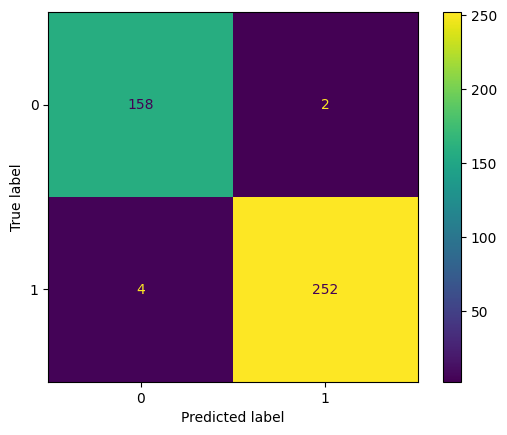

In [72]:
#Visualisasi Confusion Matrix data train
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_train, y_train_encoded))

    Dari hasil diatas saya mendapatkan :

    1. False Negative menjadi 4 yang sebelum 0 sebelum dituning, memang jadi lebih jelek sedikit tapi balik lagi ke tujuan bahwa model yang terlalu sempurna tidak baik karena terindikasi overfitting
    2. False Positif juga bertambah jadi 2 (sebelumnya 0) ini tidak terlalu berbahaya karena kalau terdeteksi model dia positif, pasien jadi lebih waspada atau cek lebih dalam lagi.
    3. TP dan TN juga sudah bagus banget kalau diliat dari hasil False Negatif dan False Positif.

Confusion Matrix : 


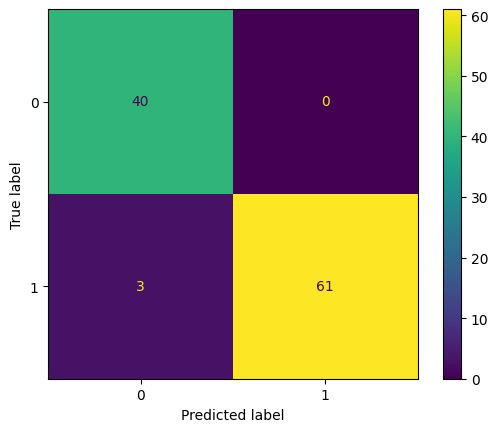

In [73]:
#Visualisasi Confusion Matrix data test
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test, y_test_encoded))

    Dari hasil Data Test diatas saya dapatkan :
    1. Penurunan pada recall 1 di data test yang sebelumnya 1 menjadi 3, terbukti bahwa performa model diturunkan supaya tidak overfit. Tapi secara realistis di dunia kedokteran hasil ini sudah bagus banget.
    2. Hasil recall 0 tidak berubah, tapi memang tidak sepenting Recall 1
    3. Untuk TP dan TN juga sudah bagus, kalau kita liat dari FN dan FP.

Cross Val before tuning

In [74]:
#cek cross val lagi before tuning
scoresModel_RF= cross_val_score(pipeline_rf, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores Random Forest Before Tuning:", scoresModel_RF)
print("Rata-rata Accuracy Random Forest Before Tuning:", scoresModel_RF.mean())
print("Standar Deviasi Accuracy Random Forest Before Tuning:", scoresModel_RF.std())

Cross Validation Accuracy Scores Random Forest Before Tuning: [0.97674419 0.92941176 0.96470588]
Rata-rata Accuracy Random Forest Before Tuning: 0.956953944368445
Standar Deviasi Accuracy Random Forest Before Tuning: 0.020085798206333386


Cross Val after tuning

In [75]:
#cek cross val lagi after tuning
scoresModel_RF= cross_val_score(rf_gridcv_best, X_train, y_train_encoded, cv=Fold, scoring='recall', n_jobs=-1)

print("Cross Validation Accuracy Scores Random Forest After Tuning:", scoresModel_RF)
print("Rata-rata Accuracy Random Forest After Tuning:", scoresModel_RF.mean())
print("Standar Deviasi Accuracy Random Forest After Tuning:", scoresModel_RF.std())

Cross Validation Accuracy Scores Random Forest After Tuning: [0.94186047 0.96470588 0.91764706]
Rata-rata Accuracy Random Forest After Tuning: 0.9414044687642499
Standar Deviasi Accuracy Random Forest After Tuning: 0.01921438987665024


    Dari hasil perbandingan crossval before dan after tuning adalah :
    - Rata-rata akurasinya menurut sedikit banget cuma di 0.01 dan std malah jadi lebih bagus 0.01
   

    Kesimpulan dari hasil tuning
    - Berbedaan tidak terlalu signifikan tapi setidaknya tidak menyentuh angka 1 (perfect)

# **BAB 10 Model Saving**

In [ ]:
#save model random forest after tuning dengan pickle
with open('model_Diabetes_Early_Detection.pkl', 'wb' ) as file:
    pickle.dump(rf_gridcv_best, file)

In [ ]:
#save model random forest before tuning dengan pickle
with open('ModelBeforeTuning.pkl', 'wb' ) as file:
    pickle.dump(pipeline_rf, file)

# **BAB 11 Model Inference**

    Inference dilakukan di file P1M2_mh_inference.ipynb

# **BAB 12 Conclusion**

    Performa Model

        Sebelum di Tuning model machine learning yang saya buat berhasil mendeteksi kelas positif dan negatif dengan cukup baik. Akan tetapi terdapat keterbatasan yang signifikan pada kelas negatif untuk pasien perempuan di usia 33 keatas.
        
        Kinerja Baik pada jenis kelamin laki-laki karena mampu menangkap kelas negatif dan positif dengan baik di berbagai umur.Keterbatasan pada Gender Perempuan lebih dari 33 tahun dimana model gagal mendeteksi kelas negatif meskipun gejala yang muncul semuanya "No" . Hal ini menunjukkan adanya bias atau kurangnya representasi data pada kelompok ini. Setelah dituning cuma ada pertambahan sedikit (33 - 34). Maka ini mungkin bias antara gender laki-laki dengan gender perempuan.

    Rekomendasi untuk model

        - Saya harus meningkatkan ukuran dataset terutama untuk pasien perempuan.
        - Penambahan fitur-fitur lain yang relevan, bisa seperti riwayat diabetes pada keluarga, pola makan dan aktifitas fisik